<a href="https://colab.research.google.com/github/dataML007/Fun_Projects/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
drive_path = 'drive/My Drive/Colab Notebooks/Git Hub Repo/Fun Projects/COVID19/'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly as py
init_notebook_mode(connected=True) 
from pandas.plotting import parallel_coordinates
import plotly.graph_objs as go # plotly graphical object
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings            
#warnings.filterwarnings("ignore") 
import os
#print(os.listdir("../input"))

from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
import pandas as pd
## load the meta data from the CSV file 
df = pd.read_csv(drive_path + 'COVID19.csv',header = 0)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [0]:
# Load Data 
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
country = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China','India']
df = df[df['Country'].isin(country)]

# Section 3 - Creating a Summary Column
df['No_of_Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [62]:
df.head()

Country,Canada,China,France,Germany,India,US,United Kingdom
Date,,,,,,,
2020-01-22,0,593,0,0,0,1,0
2020-01-23,0,691,0,0,0,1,0
2020-01-24,0,982,2,0,0,2,0
2020-01-25,0,1487,3,0,0,2,0
2020-01-26,1,2180,3,0,0,5,0


In [0]:
# Restructure Data
df = df.pivot(index='Date', columns='Country', values='No_of_Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

In [0]:
# Calculate per capita 100,000  
population = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228, 'India':1380004385}
percapita = covid.copy()
for countries in list(percapita.columns):
    percapita[countries] = percapita[countries]/population[countries]*100000

In [63]:
covid.head()

,Canada,China,France,Germany,India,US,United Kingdom
Date,,,,,,,
2020-01-22,0,593,0,0,0,1,0
2020-01-23,0,691,0,0,0,1,0
2020-01-24,0,982,2,0,0,2,0
2020-01-25,0,1487,3,0,0,2,0
2020-01-26,1,2180,3,0,0,5,0


Text(2020-03-12 00:00:00, 2543218, 'COVID-19 by Country Cases')

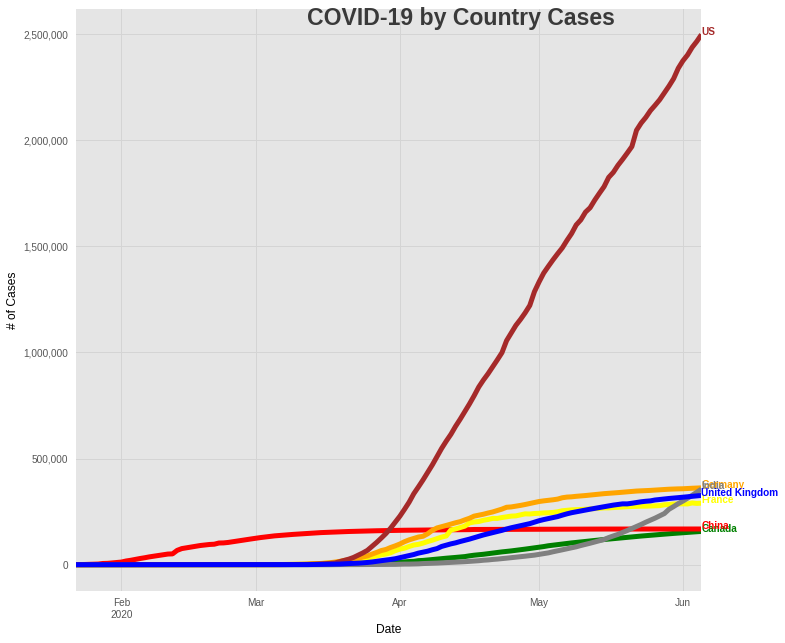

In [80]:
# Generate Colours and Style
colors = {'Canada':'Green', 'China':'Red', 'France':'Yellow', 'Germany':'Orange', 'India': 'Grey', 'US':'Brown', 'United Kingdom':'Blue'}
plt.style.use('ggplot')

# Create Visualization
plot = covid.plot(figsize=(10,10), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date',color='black')
plot.set_ylabel('# of Cases',color='black')

# Assign Color
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Add Labels
plot.text(x = covid.index[50], y = int(covid.max().max())+45000, s = "COVID-19 by Country Cases", fontsize = 23, weight = 'bold', alpha = .75,color='black')
#plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
#plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io  Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)


Text(2020-01-23 00:00:00, 780.7788401086841, 'Per Capita COVID-19 Cases by Country')

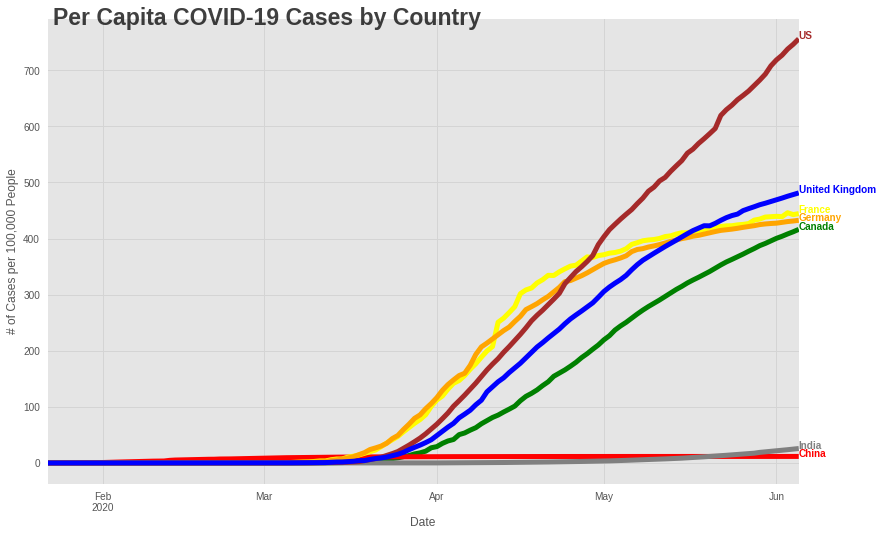

In [83]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75, color='black')


In [86]:
!pip install moviepy

In [87]:
!pip install glob3

  Created wheel for glob3: filename=glob3-0.0.1-cp36-none-any.whl size=1678 sha256=cb111d0d7751a28c4afa9c100f1380d9636db04e93215fe8cf8f0817da4e7545
  Stored in directory: /root/.cache/pip/wheels/5c/db/36/aae4683ac0ba95eb154510b48d6bda87fbaac71b6a9b62123d
Successfully built glob3


In [0]:
import glob
import moviepy.editor as mpy
from datetime import datetime
from datetime import timedelta

# Section 2 - Loading Data into Dataframes
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'])
populations = pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#', usecols=['NAME', 'POPESTIMATE2019'])

# Section 3 - Merging in Population Data & Calculating Rates
df = pd.merge(df, populations, how = 'left', left_on = 'state', right_on = 'NAME')
df['rate'] = df['cases'] / df['POPESTIMATE2019'] * 100000

In [120]:
topfivestates_rate

['New York',
 'New Jersey',
 'Massachusetts',
 'Rhode Island',
 'District of Columbia',
 'California',
 'Washington']

In [0]:
# Section 4 - Identifying States
df_today = df[df['date'] == datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')]
topfivestates_rate = list(df_today.sort_values(by='rate', ascending=False).head()['state'])
topfivestates_rate.append('California')
topfivestates_rate.append('Washington')

# Section 5 - Filtering our Dataset
df = df[df['state'].isin(topfivestates_rate)]
df = df[df['date'] >= '2020-03-01']
df = df.pivot(index = 'date', columns = 'state', values = 'rate')

# Section 6 - Preparing out Dataset for Graphing
df = df.reset_index()
df = df.reset_index(drop=True)
df = df.drop(columns = 'date')

In [118]:
df.head()

state,California,District of Columbia,Massachusetts,New Jersey,New York,Rhode Island,Washington
0,0.083518,NaN,0.014509,NaN,0.005140,0.188793,0.223247
1,0.096173,NaN,0.029017,NaN,0.005140,0.188793,0.302040
2,0.113889,NaN,0.029017,NaN,0.010281,0.188793,0.420229
3,0.139197,NaN,0.029017,0.011258,0.056545,0.188793,0.617212
4,0.169568,NaN,0.043526,0.022517,0.113090,0.188793,0.984912


In [129]:
df.iloc[:10]

state,California,District of Columbia,Massachusetts,New Jersey,New York,Rhode Island,Washington
0,0.083518,NaN,0.014509,NaN,0.005140,0.188793,0.223247
1,0.096173,NaN,0.029017,NaN,0.005140,0.188793,0.302040
2,0.113889,NaN,0.029017,NaN,0.010281,0.188793,0.420229
3,0.139197,NaN,0.029017,0.011258,0.056545,0.188793,0.617212
4,0.169568,NaN,0.043526,0.022517,0.113090,0.188793,0.984912
5,0.205000,NaN,0.116068,0.045034,0.226180,0.283190,1.129366
6,0.253086,0.141693,0.188611,0.045034,0.457500,0.283190,1.444538
7,0.283457,0.141693,0.406238,0.067551,0.544887,0.283190,1.851635
8,0.435308,0.566774,0.594849,0.123843,0.729943,0.283190,2.350657
9,0.453024,0.566774,1.334784,0.168877,0.889297,0.471983,3.663873


In [0]:
# Section 7 - Graphing our Data
plt.style.use('fivethirtyeight')
length = len(df.index)
for i in range(10,length+10):
    ax = df.iloc[:i].plot(figsize=(12,8), linewidth=5, color = ['#173F5F', '#20639B', '#2CAEA3', '#F6D55C', '#ED553B', '#B88BAC', '#827498'])
    ax.set_ylim(0, 1000)
    ax.set_xlabel('Days since March 1, 2020')
    ax.set_ylabel('# of Cases per 100,000 People')
    ax.set_title("Cases per 100,000 People", fontsize = 18)
    ax.legend(loc='upper left', frameon=False)
    ax.grid(axis='x')
    fig = ax.get_figure()
    fig.savefig(drive_path + f"/IMG/{i}.png")

In [106]:
# Section 8 - Generating our GIF
gif_name = drive_path + "IMG/" + 'COVID'
fps = 6
file_list = glob.glob(drive_path + '/IMG/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)


[MoviePy] Building file drive/My Drive/Colab Notebooks/Git Hub Repo/Fun Projects/COVID19/IMG/COVID.gif with imageio


100%|██████████| 98/98 [00:07<00:00, 13.57it/s]


In [104]:
drive_path + "/IMG/" + gif_name

'drive/My Drive/Colab Notebooks/Git Hub Repo/Fun Projects/COVID19//IMG/COVID.gif'

# <img src="drive/My Drive/Colab Notebooks/Git Hub Repo/Fun Projects/COVID19//IMG/COVID.gif" width="750" align="center">

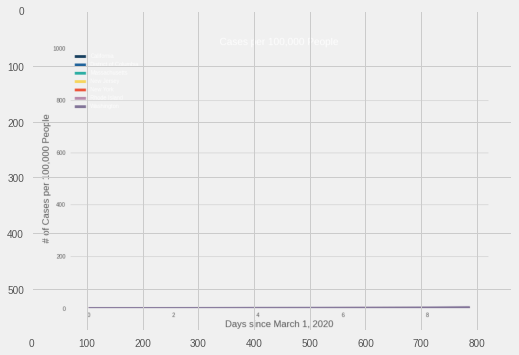